In [111]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

# Tensor <br>
Available operations on tensor: https://pytorch.org/docs/stable/torch.html

In [26]:
# From list
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

# From numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# From another tensor
x_ones = torch.ones_like(x_data) # retains the properties (shape) of x_data
print(f"Ones Tensor: \n {x_ones} \n")

# overrides the datatype of x_data
# Similar to numpy array, a tensor can only store one datatype
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7461, 0.4301],
        [0.2130, 0.7024]]) 



In [31]:
shape = (4, 5)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2559, 0.1310, 0.2616, 0.7853, 0.4982],
        [0.7821, 0.5470, 0.5181, 0.2816, 0.4131],
        [0.2964, 0.9288, 0.3784, 0.7883, 0.1867],
        [0.4313, 0.3456, 0.7428, 0.9563, 0.9633]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [37]:
# Attributes of a tensor

# By default, tensors are created on the CPU
# Copying large tensors across devices can be expensive in terms of time and memory
# Typically, CPU memory is larger than GPU memory
tensor_cpu = torch.rand(3, 4)
tensor_gpu = tensor_cpu.to("cuda")
tensor_back_to_cpu = tensor_gpu.to("cpu")

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"CPU tensor is stored on: {tensor_cpu.device}")
print(f"It is sent to: {tensor_gpu.device}")
print(f"It is sent back to: {tensor_back_to_cpu.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
CPU tensor is stored on: cpu
It is sent to: cuda:0
It is sent back to: cpu


In [39]:
# A lot of tensor operations are identical to Numpy array operations

tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[:, -1]}")

tensor[:, 1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [41]:
# Joining tensors

print(torch.cat([tensor, tensor, tensor], dim=0)) # Concatenating along the row
print(torch.cat([tensor, tensor, tensor], dim=1)) # Concatenating along the column

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [53]:
# Python decorator examples

def tracer_1(function):
    def extra_function():
        print("Beginning the original function")
        function()
        print("Ending the original function")
    return extra_function

def tracer_2(function):
    def extra_function():
        print("Beginning the original function")
        function()
        print("Ending the original function")
    return extra_function()

def original_function():
    print("Inside of the original function")
    
# Equivalent to: tracer_1(original_function)()
decorated_function = tracer_1(original_function)
decorated_function()

tracer_2(original_function)

Beginning the original function
Inside of the original function
Ending the original function
Beginning the original function
Inside of the original function
Ending the original function


In [61]:
# Decorator with arguments

def decorator_fun(func):
    print("Inside decorator")
    def inner(*args, **kwargs):
        print("Inside inner function")
        print("Decorated the function")
        print("Arguments:", args)
        print("Keyword arguments:", kwargs)
        func()
    return inner

# Equivalent to: decorator_fun(func_to)()
@decorator_fun
def func_to_1():
    print("Inside actual function")
    
func_to_1()

Inside decorator
Inside inner function
Decorated the function
Arguments: ()
Keyword arguments: {}
Inside actual function


In [63]:
def func_to_2():
    print("Inside actual function")

decorator_fun(func_to_2)(1, 2, 3)

Inside decorator
Inside inner function
Decorated the function
Arguments: (1, 2, 3)
Keyword arguments: {}
Inside actual function


In [64]:
# Arithmetic operations

# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [70]:
my_tensor_1 = torch.rand((5, 5))
my_tensor_2 = torch.rand((5, 5))

print(my_tensor_1.matmul(my_tensor_2))
print(my_tensor_1.mul(my_tensor_2))

tensor([[0.4245, 0.8693, 0.6016, 0.9920, 0.7234],
        [0.9105, 1.6117, 1.0944, 1.6773, 1.5853],
        [0.9123, 0.7907, 0.5330, 1.4483, 0.6869],
        [1.1653, 1.3335, 1.3034, 1.8494, 1.0877],
        [0.6791, 0.7024, 0.6373, 1.0058, 0.6182]])
tensor([[0.1590, 0.1581, 0.0082, 0.1257, 0.0944],
        [0.0047, 0.9236, 0.3204, 0.0192, 0.4786],
        [0.5021, 0.3171, 0.0287, 0.1346, 0.2048],
        [0.0407, 0.2326, 0.4602, 0.4271, 0.0782],
        [0.1350, 0.0011, 0.2995, 0.0250, 0.0209]])


In [75]:
# Single-element tensors If you have a one-element tensor, for example by aggregating all values of a tensor 
# into one value, you can convert it to a Python numerical value using item():
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))
print(type(agg))

12.0 <class 'float'>
<class 'torch.Tensor'>


In [76]:
# In-place operations are denoted by a _ suffix
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [78]:
# This operation returns the result tensor, not modifying the given one.
tensor.add(5)
print(tensor)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [ ]:
# Tensors on the CPU and NumPy arrays can share their underlying memory locations, 
# and changing one will change the other.

In [79]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [80]:
# A change in the tensor reflects in the NumPy array.
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [81]:
n = np.ones(5)
t = torch.from_numpy(n)

In [82]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


In [84]:
# As they share the same memory, changing the tensor also changes the numpy (and vice versa)
t.add_(5)
print(n)

[7. 7. 7. 7. 7.]


# Datasets & Dataloaders

We load the FashionMNIST Dataset with the following parameters:

        root is the path where the train/test data is stored,

        train specifies training or test dataset,

        download=True downloads the data from the internet if it’s not available at root.

        transform and target_transform specify the feature and label transformations

In [85]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

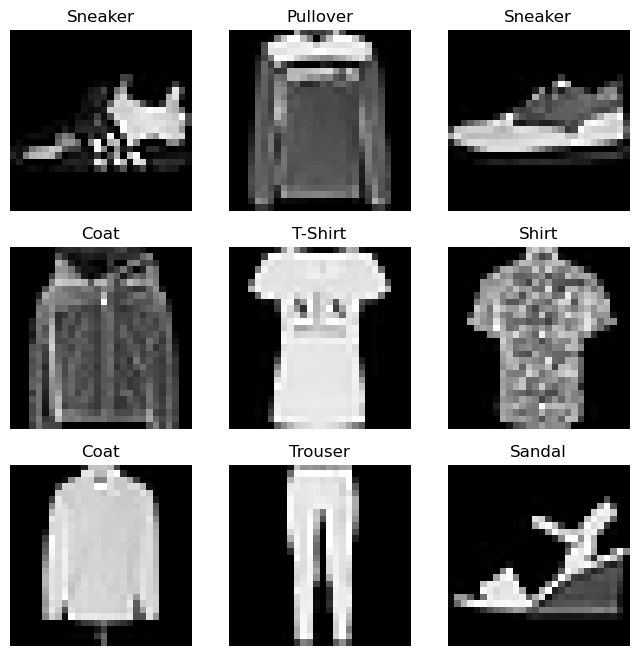

In [91]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    # Random index
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [97]:
image, label = training_data[0]
print(type(image), image.shape)

<class 'torch.Tensor'> torch.Size([1, 28, 28])


In [100]:
# Creating a custom dataset for my files (for image files)
# A custom Dataset class must implement three functions: __init__, __len__, and __getitem__

# The __init__ function is run once when instantiating the Dataset object. 
# We initialize the directory containing the images, the annotations file, and both transforms

# The __getitem__ function loads and returns a sample from the dataset at the given index idx. 
# Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, 
# retrieves the corresponding label from the csv data in self.img_labels, 
# calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [101]:
# Dataloader is an iterable 
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled. 

In [104]:
train_features.shape

torch.Size([64, 1, 28, 28])

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


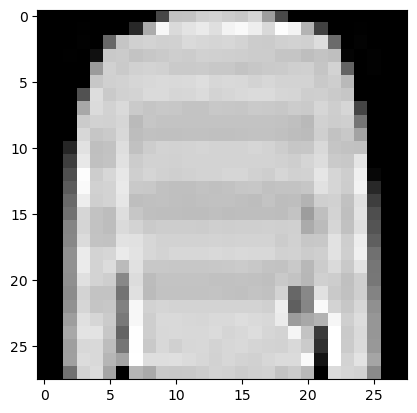

Label: 2


In [110]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# squeeze() -> Returns a tensor with all the dimensions of input of size 1 removed
# The returned tensor shares the same memory space with the input tensor
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

scatter_() -> https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html#torch.Tensor.scatter_ <br>
Tensor.scatter_(dim, index, src, reduce=None) → Tensor <br>
When dim = 0, then the source values will stay in their original columns (and heights, etc), but move to a different row.

In [116]:
y_test = 3
lambda_func = lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)
lambda_func(y_test)

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [117]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# Build the Neural Network

In [119]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
# We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__. 
# Every nn.Module subclass implements the operations on input data in the forward method.

# nn.Sequential is an ordered container of modules. Check the following for more details.
# https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [126]:
# We create an instance of NeuralNetwork, and move it to the device, and print its structure.
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call model.forward() directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the nn.Softmax module. <br>
Rows: Each image / Columns: output values to the labels

In [129]:
# Generating two random images
X = torch.rand(2, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0, 1], device='cuda:0')


In [130]:
logits

tensor([[ 0.0885,  0.0425,  0.0292, -0.0655, -0.0576, -0.0184, -0.0579, -0.0769,
         -0.1545,  0.0230],
        [ 0.0371,  0.0602,  0.0031, -0.0621, -0.0516, -0.0353, -0.0292, -0.0472,
         -0.1117, -0.0803]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [131]:
pred_probab

tensor([[0.1117, 0.1067, 0.1053, 0.0958, 0.0966, 0.1004, 0.0965, 0.0947, 0.0876,
         0.1047],
        [0.1070, 0.1095, 0.1034, 0.0969, 0.0979, 0.0995, 0.1001, 0.0983, 0.0922,
         0.0951]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

# Automatic Differentiation with torch.autograd

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

Full article: https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

In [147]:
# You can set the value of requires_grad when creating a tensor, or later by using x.requires_grad_(True) method.
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

# Matrix multiplication
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [139]:
z

tensor([-0.4577, -4.1315,  6.4695], grad_fn=<AddBackward0>)

In [140]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x000001BC0FD16AD0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x000001BC0FCD28C0>


We can only obtain the grad properties for the leaf nodes of the computational graph, which have requires_grad property set to True. For all other nodes in our graph, gradients will not be available.

We can only perform gradient calculations using backward once on a given graph, for performance reasons. If we need to do several backward calls on the same graph, we need to pass retain_graph=True to the backward call. Otherwise it will throw an error.

In [141]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1292, 0.0053, 0.3328],
        [0.1292, 0.0053, 0.3328],
        [0.1292, 0.0053, 0.3328],
        [0.1292, 0.0053, 0.3328],
        [0.1292, 0.0053, 0.3328]])
tensor([0.1292, 0.0053, 0.3328])


In [142]:
# Throws an error, as it is (by default) not possible to backtrack twice for a graph.
loss.backward()
print(w.grad)
print(b.grad)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

Disabling Gradient Tracking

By default, all tensors with requires_grad=True are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with torch.no_grad() block:


There are reasons you might want to disable gradient tracking:

1. To mark some parameters in your neural network as frozen parameters.
2. To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.



In [148]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)
print(w.requires_grad)

True
False
True


Another way to achieve the same result is to use the detach() method on the tensor:

In [144]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


More on Computational Graphs

Conceptually, autograd keeps a record of data (tensors) and all executed operations (along with the resulting new tensors) in a directed acyclic graph (DAG) consisting of Function objects. In this DAG, leaves are the input tensors, roots are the output tensors. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

1. run the requested operation to compute a resulting tensor
2. maintain the operation’s gradient function in the DAG.

The backward pass kicks off when .backward() is called on the DAG root. autograd then:

1. computes the gradients from each .grad_fn,
2. accumulates them in the respective tensor’s .grad attribute
3. using the chain rule, propagates all the way to the leaf tensors.

Note

DAGs are dynamic in PyTorch. An important thing to note is that the graph is recreated from scratch; after each .backward() call, autograd starts populating a new graph. This is exactly what allows you to use control flow statements in your model; you can change the shape, size and operations at every iteration if needed.

# Optimizing Model Parameters

In [149]:
# Re-defining previous codes, for readability
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [160]:
# Hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 5

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an epoch.

Each epoch consists of two main parts:

1. The Train Loop - iterate over the training dataset and try to converge to optimal parameters.
2. The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.

In [161]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; additionally, there are many different optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [162]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:

1. Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
2. Backpropagate the prediction loss with a call to loss.backward(). PyTorch deposits the gradients of the loss w.r.t. each parameter.
3. Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.



In [163]:
len(training_data)

60000

In [164]:
len(train_dataloader)

938

In [165]:
60000 / 64

937.5

In [166]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        
        # Removing the gradient calculated from the previous iteration
        optimizer.zero_grad()
        # Calculating the gradients of the parameters, and save the gradients to parameter tensors
        loss.backward()
        # Updating the parameters; the parameters were directly registered to the optimiser
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# The testing results do not affect the training; the training is only based on the training set
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    # We do not need to calculate the gradients for testing; we only do forward pass
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [167]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.302521  [   64/60000]
loss: 2.284610  [ 6464/60000]
loss: 2.264922  [12864/60000]
loss: 2.267855  [19264/60000]
loss: 2.248837  [25664/60000]
loss: 2.217931  [32064/60000]
loss: 2.235855  [38464/60000]
loss: 2.191453  [44864/60000]
loss: 2.187317  [51264/60000]
loss: 2.158524  [57664/60000]
Test Error: 
 Accuracy: 43.2%, Avg loss: 2.152836 

Epoch 2
-------------------------------
loss: 2.159380  [   64/60000]
loss: 2.143841  [ 6464/60000]
loss: 2.087281  [12864/60000]
loss: 2.110425  [19264/60000]
loss: 2.053046  [25664/60000]
loss: 1.995906  [32064/60000]
loss: 2.026127  [38464/60000]
loss: 1.940389  [44864/60000]
loss: 1.946012  [51264/60000]
loss: 1.872364  [57664/60000]
Test Error: 
 Accuracy: 55.8%, Avg loss: 1.870565 

Epoch 3
-------------------------------
loss: 1.902324  [   64/60000]
loss: 1.865633  [ 6464/60000]
loss: 1.750605  [12864/60000]
loss: 1.801267  [19264/60000]
loss: 1.688998  [25664/60000]
loss: 1.641328  [32064/600

# Save and Load the Model

Check: https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html

# Training a model (QuickStart)

If you are already familiar with other deep learning frameworks, then you may only need to check this section to get a brief idea about the Pytorch pipeline.

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
# Here we define a batch size of 64, i.e. each element in the dataloader iterable will 
# return a batch of 64 features and labels.
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    print(X)
    print(y)
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0.,

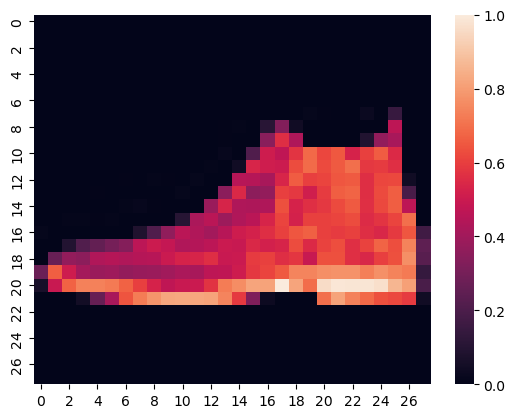

In [10]:
for X, y in test_dataloader:
    sns.heatmap(X[0][0])
    break

In [11]:
# To define a neural network in PyTorch, we create a class that inherits from nn.Module. 
# We define the layers of the network in the __init__ function and specify how data will pass through 
# the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Loading the model to the GPU's memory
model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [16]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
test_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [17]:
# In a single training loop, the model makes predictions on the training dataset (fed to it in batches), 
# and backpropagates the prediction error to adjust the model’s parameters.
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [18]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [21]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307534  [   64/60000]
loss: 2.167217  [ 6464/60000]
loss: 1.840225  [12864/60000]
loss: 1.553537  [19264/60000]
loss: 1.183067  [25664/60000]
loss: 1.071244  [32064/60000]
loss: 0.998889  [38464/60000]
loss: 0.878722  [44864/60000]
loss: 0.866610  [51264/60000]
loss: 0.801363  [57664/60000]
Test Error: 
 Accuracy: 70.2%, Avg loss: 0.798577 

Epoch 2
-------------------------------
loss: 0.810939  [   64/60000]
loss: 0.855113  [ 6464/60000]
loss: 0.594799  [12864/60000]
loss: 0.816536  [19264/60000]
loss: 0.677616  [25664/60000]
loss: 0.633795  [32064/60000]
loss: 0.695376  [38464/60000]
loss: 0.685091  [44864/60000]
loss: 0.683371  [51264/60000]
loss: 0.628821  [57664/60000]
Test Error: 
 Accuracy: 78.2%, Avg loss: 0.629350 

Epoch 3
-------------------------------
loss: 0.558824  [   64/60000]
loss: 0.660280  [ 6464/60000]
loss: 0.434663  [12864/60000]
loss: 0.697811  [19264/60000]
loss: 0.590250  [25664/60000]
loss: 0.549186  [32064/600

In [153]:
print("슈퍼인공지능문어다녀감")

슈퍼인공지능문어다녀감


In [154]:
print("평범한공룡인형도다녀감")

평범한공룡인형도다녀감


In [155]:
print("삼색고양이나나도다녀감")

삼색고양이나나도다녀감


In [156]:
print("검은고양이자자도다녀감")

검은고양이자자도다녀감
